In [1]:
''' Aqui serão analisados indicadores do pib per capita, dos países do mundo,
usando um dataset retirado do Kaggle'''
import pandas as pd
import numpy as np  
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importando os dados
paises=pd.read_csv('pib_capta.csv')
paises.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.594520,31650.760540,24487.863560,29342.100860,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.913035,162.551683,172.002460,199.189238,179.387799,198.230368,...,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,...,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757,NaN


In [3]:
#Vamos retirar a coluna incator_name, pois não será necessária
paises.drop(columns=['Indicator Name'], inplace=True)
paises.head()

,Country Name,Country Code,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.594520,31650.760540,24487.863560,29342.100860,NaN
1,Africa Eastern and Southern,AFE,NY.GDP.PCAP.CD,162.913035,162.551683,172.002460,199.189238,179.387799,198.230368,209.414665,...,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730,NaN
2,Afghanistan,AFG,NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,...,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614,NaN
3,Africa Western and Central,AFW,NY.GDP.PCAP.CD,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,142.895375,...,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626,NaN
4,Angola,AGO,NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757,NaN


In [5]:
paises.drop(columns=['Indicator Code'], inplace=True)
paises.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.594520,31650.760540,24487.863560,29342.100860,NaN
1,Africa Eastern and Southern,AFE,162.913035,162.551683,172.002460,199.189238,179.387799,198.230368,209.414665,211.707060,...,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730,NaN
2,Afghanistan,AFG,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,...,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614,NaN
3,Africa Western and Central,AFW,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,142.895375,127.303606,...,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757,NaN


In [4]:
#Agora vamos fazer uma análise exploratória dos dados
paises.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,134.000000,136.000000,138.000000,138.000000,138.000000,149.000000,152.000000,155.000000,160.000000,160.000000,...,259.000000,260.000000,258.000000,257.000000,257.000000,257.000000,255.000000,252.000000,245.000000,0.0
mean,473.510092,486.410354,510.260677,541.643978,587.377121,648.080005,703.243553,718.928031,735.351563,796.544472,...,16769.409695,17083.749780,15424.143044,15583.178581,16383.871160,17345.033679,17231.826925,15774.327163,16882.489858,NaN
std,612.426899,635.116862,666.397524,705.758419,772.263607,849.987350,921.814054,954.784786,982.953554,1060.021821,...,25382.744314,25945.671884,23375.108562,23585.819543,24397.360393,25978.232827,25791.647932,24065.258711,26113.588997,NaN
min,40.119192,26.318449,26.983496,28.434172,20.018579,16.577652,12.786964,12.900238,20.395642,20.682296,...,241.547671,257.818552,289.359633,242.065671,243.135809,231.446476,216.972968,216.826741,221.477676,NaN
25%,107.258234,110.089913,114.277857,122.509292,123.574875,140.756742,145.396584,152.410537,149.457032,151.634207,...,2110.418190,2173.282618,2097.331179,2079.448266,2088.500117,2269.177012,2186.046581,2139.636129,2304.844567,NaN
50%,217.932654,197.938953,202.801243,210.677240,232.182537,251.239040,266.219488,252.252422,292.642193,293.802194,...,6755.073675,6904.579093,6192.562429,6079.088736,6436.791746,6912.110297,6837.717826,6034.203335,6621.574336,NaN
75%,476.295836,485.401860,538.891433,586.773416,639.414205,681.131112,768.852316,763.567965,760.566852,826.288906,...,19792.134135,20277.795912,18210.359455,18575.232030,19743.954910,20614.898860,19809.323135,18652.166725,18751.026510,NaN
max,3007.123445,3066.562869,3243.843078,3374.515171,3573.941185,4081.915955,4229.254573,4336.426587,4695.923390,5032.144743,...,185066.578100,195780.006900,170337.924400,174610.637000,173612.864600,194280.822100,199377.481800,182538.638300,234315.460500,NaN


<Axes: title={'center': 'Distribuição do pib per capita em 2018'}, xlabel='2018'>

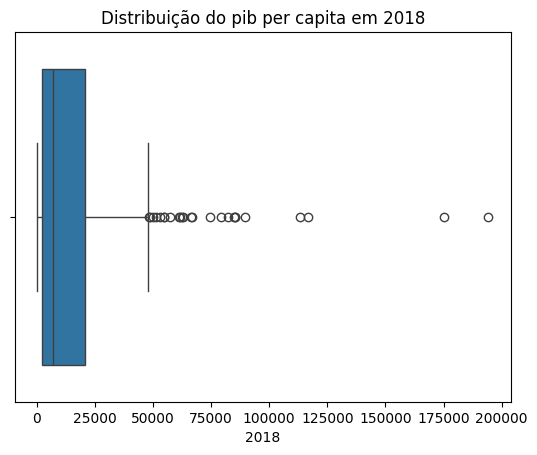

In [5]:
#Vamos  fazer um boxplot para ver a distribuição dos pib per capita em 2018
grafico=sns.boxplot(data=paises, x='2018')
grafico.set_title('Distribuição do pib per capita em 2018')
grafico

In [6]:
#Agora faremos o mesmo grafico usando a biblioteca plotly
fig = go.Figure(go.Box(y=paises['2018'], name='2018'))
fig.update_layout(title='Distribuição do pib per capita em 2018')
fig.show()

In [7]:
#Agora vamos fazer um mapa de onde quando mais quente for a cor maior será o pib per capta e a cor mais fria menor será o pib per capita, interativo com uma linha do tempo de 1960 a 2018
fig = px.choropleth(paises, locations="Country Name", locationmode='country names', color="2018", hover_name="Country Name", range_color=[0,100000], color_continuous_scale="thermal", title='Evolução do PIB per capita por país')
fig.show()

In [8]:
#Agora vamos ver a evolução do pib per capita mundial de 1960 a 2018
evolucao=paises.drop(columns=['Country Name'])
evolucao.head()


,Country Code,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ABW,NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.594520,31650.760540,24487.863560,29342.100860,NaN
1,AFE,NY.GDP.PCAP.CD,162.913035,162.551683,172.002460,199.189238,179.387799,198.230368,209.414665,211.707060,...,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730,NaN
2,AFG,NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,...,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614,NaN
3,AFW,NY.GDP.PCAP.CD,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,142.895375,127.303606,...,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626,NaN
4,AGO,NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757,NaN


In [11]:
paises2=evolucao.drop(columns=['Country Code'])
paises2.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.594520,31650.760540,24487.863560,29342.100860,NaN
1,162.913035,162.551683,172.002460,199.189238,179.387799,198.230368,209.414665,211.707060,224.239783,249.589133,...,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730,NaN
2,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,134.012768,134.250360,...,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614,NaN
3,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,142.895375,127.303606,128.365494,142.325904,...,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757,NaN


In [9]:
#Agora vamos fazer um gráfico de linha para ver a evolução do pib per capita mundial de 1960 a 2018
fig = go.Figure()
fig.add_trace(go.Scatter(x=paises2.columns, y=paises2.mean(), mode='lines+markers', name='lines+markers'))
fig.update_layout(title='Evolução do PIB per capita mundial de 1960 a 2020')
fig.show()

NameError: name 'paises2' is not defined

In [10]:
#Agora vamos fazer analises a respeito do Brasil
brasil=paises[paises['Country Name']=='Brazil']
brasil.head()

,Country Name,Country Code,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
29,Brazil,BRA,NY.GDP.PCAP.CD,232.998762,229.336766,247.8343,291.404006,254.838581,265.475398,325.173107,...,12258.50317,12071.15821,8783.225984,8680.768792,9896.684783,9121.083403,8845.259118,6794.489159,7507.160971,NaN


In [11]:
ev_brasil= go.Figure(
    data=[go.Scatter(x=brasil.columns, y=brasil.iloc[0], mode='lines+markers', name='lines+markers')],
    layout=go.Layout(title='Evolução do PIB per capita do Brasil de 1960 a 2021')
)
ev_brasil.show()